##**Τελική Εργασία - Παπαχρήστου Σοφία**

(Μέρος twitter analysis) Εξαφάνιση Θύμιου Μπουγά: ο αόρατος ανθρωπος που βρέθηκε


---


Θα ασχοληθώ στο Twitter με την εξαφάνιση του Θύμιου Μπουγά, ο οποίος είχε εξαφανιστεί μετά από πολλές επιθέσεις bullying σε βαρος του. Η εξαφάνιση του ευαισθητοποίησε το twitter και μέλη της κοινωνίας, όχι μόνο λόγω του bullying που υπέστη αλλά και λόγω της κατάστασης της υγείας του. Ευτυχώς, βρέθηκε ζωντανός από τις αστυνομικές αρχές το Σάββατο 18/6/2022 και το twitter αντέδρασε σε αυτή την είδηση. Θα πάρω δεδομένα από κάποιες μέρες πριν βρεθεί και από την μέρα που βρέθηκε και μετά

https://www.news247.gr/eksafanish

## Εξαγωγή δεδομένων απο Twitter & αποθήκευση

In [2]:
!pip install Twython
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
from twython import Twython, TwythonError

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
CONSUMER_KEY = 
CONSUMER_SECRET = 
OAUTH_TOKEN = 
OAUTH_TOKEN_SECRET = 
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [4]:
tweets = []
MAX_ATTEMPTS = 50
COUNT_OF_TWEETS_TO_BE_FETCHED = 5000
for i in range(0,MAX_ATTEMPTS):
    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        break 
    if(0 == i):
        query = 'Θυμιος OR Μπουγας OR #θυμιος OR #Θυμιος_Μπουγας OR #ευθυμης_μπουγας -filter:retweets'
        results = twitter.cursor(twitter.search, q=query, count='100')
    else:   
        results = twitter.cursor(twitter.search, q=query,count='100', include_entities='true', max_id=next_max_id)
    for result in results:
        tweets.append(result)
    try:
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        break

In [28]:
tweets_df = pd.DataFrame(tweets)
tweets_df.tail()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
1116,Mon Jun 13 10:14:36 +0000 2022,1536290934371012608,1536290934371012608,Τάκης Μπουγάς &amp; Στράτος Καραλής – Σπάνιο β...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,0,False,False,False,el,NaN,NaN,NaN,NaN
1117,Mon Jun 13 00:23:50 +0000 2022,1536142261905510401,1536142261905510401,"(Οι εκλογές, ο Ι.Μπούγας, η αγωνία των βουλευ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""https://doridanews.gr"" rel=""nofollow""...",NaN,None,...,0,0,False,False,False,el,NaN,NaN,NaN,"{'media': [{'id': 1536142259795664897, 'id_str..."
1118,Sun Jun 12 18:52:01 +0000 2022,1536058758572527617,1536058758572527617,Στίχοι:Πάνος Φαλάρας &amp; Γ.Σαββιδάκης\nΜουσι...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,0,1,False,False,False,el,NaN,NaN,NaN,NaN
1119,Sun Jun 12 09:28:52 +0000 2022,1535917037289099264,1535917037289099264,@stelioskts @tazmanolis Ο Μπουγάς λιμουζιν κ ω...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.535912e+18,1535912335747039232,...,0,1,False,False,NaN,el,NaN,NaN,NaN,NaN
1120,Sat Jun 11 20:01:56 +0000 2022,1535713966189600768,1535713966189600768,@MariaPavlidou18 Οχι τιποτα ακομη..τελικα αυτο...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.535691e+18,1535691113268404226,...,0,0,False,False,NaN,el,NaN,NaN,NaN,NaN


In [29]:
tweets_df.shape

(1121, 29)

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/thimios_mpougas.csv", sep='t', encoding='utf-8', index=False)

In [3]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/thimios_mpougas.csv", sep='t')

In [9]:
df.head(2)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Mon Jun 20 21:49:37 +0000 2022,1539002556034301952,1539002556034301952,"Ο Θύμιος Μπούγας, αυτός ο σπάνιος άνθρωπος δεν...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,3,11,False,False,False,el,NaN,NaN,NaN,NaN
1,Mon Jun 20 21:49:04 +0000 2022,1539002416368173058,1539002416368173058,#θυμιος ο Θυμιος εν τω μεταξυ ΟΥΤΕ ΠΟΥ ΗΞΕΡΕ ο...,True,"{'hashtags': [{'text': 'θυμιος', 'indices': [0...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,0,False,False,NaN,el,NaN,NaN,NaN,NaN


## Επεξεργασία df (columns, date, text, replace...)

In [4]:
short_tweets = df[['created_at','text','retweet_count', 'favorite_count', 'user', 'id']]

In [5]:
short_tweets = short_tweets.rename(columns={'created_at': 'date'} )

In [6]:
#Βλέπω ότι η στήλη user έχει πολλά οπότε θα κρατήσω μόνο το name
import ast
short_tweets['user'] = short_tweets['user'].apply(ast.literal_eval) #αν δεν βάλω αυτό δεν λειτουργεί το get απο κάτω
short_tweets['user'] = short_tweets['user'].apply(lambda x: x.get('name'))

In [7]:
#κείμενα σε πεζούς χαρακτήρες (απαλοιφή κεφαλαίων)
short_tweets['text'] = short_tweets['text'].str.lower()

In [10]:
#Ας μετατρέψουμε το string της ημερομηνίας σε datetime
from datetime import datetime

In [11]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [12]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [13]:
short_tweets.tail(1)

,date,text,retweet_count,favorite_count,user,id,year,month,day
1120,2022-06-11 20:01:56,@mariapavlidou18 οχι τιποτα ακομη..τελικα αυτο...,0,0,Ηρώ Νεοφύτου,1535713966189600768,2022,6,11


In [14]:
#Βρίσκω ποια απο τα tweets εχουν τα περισσότερα rt
short_tweets.sort_values(ascending=False, by='retweet_count').head()

,date,text,retweet_count,favorite_count,user,id,year,month,day
987,2022-06-18 16:51:28,"βρέθηκε ο θύμιος μπουγας, εντοπίστηκε σε εγκατ...",164,1237,Ίαν,1538202748038127617,2022,6,18
71,2022-06-20 17:39:12,"🌹ο θύμιος που εισέπραξε κακία και μισανθρωπιά,...",110,408,ᦓ꠸ꪑꪮꪀꪶꫀꪮꪀꫀ,1538939538097291265,2022,6,20
958,2022-06-18 16:58:53,να γράψουμε και κάτι ευχάριστο: εντοπίστηκε στ...,92,356,Emanuel Kypreos,1538204614352322562,2022,6,18
872,2022-06-18 17:15:14,η καλή είδηση της μέρας είναι ότι εντοπίστηκε ...,76,464,Areti Athanasiou,1538208729102950401,2022,6,18
116,2022-06-20 15:03:29,είναι καλά λέει ο ίδιος ο #θυμιος και ευχαριστ...,74,570,I am Thor ⚡⚡⚡❤👩‍💻,1538900351683805186,2022,6,20


In [15]:
#Βρίσκω ποια απο τα tweets εχουν τα περισσότερα fave
short_tweets.sort_values(ascending=False, by='favorite_count').head()

,date,text,retweet_count,favorite_count,user,id,year,month,day
987,2022-06-18 16:51:28,"βρέθηκε ο θύμιος μπουγας, εντοπίστηκε σε εγκατ...",164,1237,Ίαν,1538202748038127617,2022,6,18
1024,2022-06-18 16:43:34,να και μία ευχάριστη είδηση‼️ είναι ζωντανός ο...,43,591,g.goudaras,1538200762563559426,2022,6,18
116,2022-06-20 15:03:29,είναι καλά λέει ο ίδιος ο #θυμιος και ευχαριστ...,74,570,I am Thor ⚡⚡⚡❤👩‍💻,1538900351683805186,2022,6,20
872,2022-06-18 17:15:14,η καλή είδηση της μέρας είναι ότι εντοπίστηκε ...,76,464,Areti Athanasiou,1538208729102950401,2022,6,18
944,2022-06-18 17:01:21,βρέθηκε ο θύμιος μπουγάς στον πύργο μετά από ε...,19,418,eReportaz,1538205236006985729,2022,6,18


In [16]:
#gia links
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [17]:
#βλέπω το text πως ειναι πριν τις αλλαγές
short_tweets['text'].tail(5)

1116    τάκης μπουγάς &amp; στράτος καραλής – σπάνιο β...
1117    (οι εκλογές, ο  ι.μπούγας, η αγωνία των βουλευ...
1118    στίχοι:πάνος φαλάρας &amp; γ.σαββιδάκης\nμουσι...
1119    @stelioskts @tazmanolis ο μπουγάς λιμουζιν κ ω...
1120    @mariapavlidou18 οχι τιποτα ακομη..τελικα αυτο...
Name: text, dtype: object

In [18]:
#Βγάζω σημεία στίξης- ειδικούς χαρακτήρες: .str.replace(r'[^\w\s]', '') για να μην ειναι κολλητα σε λεξεις
#για να βγάλω mention στα tweets με απαντησεις: replace(r'\s*@\w+', '', regex=True)
#Βγάζω και κάποιες άκυρες λέξεις που είδα οτι υπάρχουν στο wordcloud μου κάτω

short_tweets['text'] = short_tweets['text'].str.replace(r'\s*@\w+', '', regex=True).str.replace(r'[^\w\s]', ' ').str.replace('θυμιος', '').str.replace('θυμιος_μπουγας', '').str.replace('θύμιος μπουγάς', '').str.replace('θύμιος', '').str.replace('_μπουγας', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [19]:
short_tweets['text'].tail(5)

1116    τάκης μπουγάς  amp  στράτος καραλής   σπάνιο β...
1117     οι εκλογές  ο  ι μπούγας  η αγωνία των βουλευ...
1118    στίχοι πάνος φαλάρας  amp  γ σαββιδάκης\nμουσι...
1119     ο μπουγάς λιμουζιν κ ωραίος για περπάτημα μάλ...
1120     οχι τιποτα ακομη  τελικα αυτος που ειδαν στα ...
Name: text, dtype: object

## Wordcloud

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy

In [21]:
text = short_tweets[short_tweets['year']==2022]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [23]:
#!python -m spacy download el_core_news_sm

In [24]:
nlp = spacy.load('el_core_news_sm')

In [25]:
list(nlp.Defaults.stop_words)[0:10]

['ολωσδιόλου',
 'όλα',
 'σας',
 'τέτοιαν',
 'ετούτους',
 'στου',
 'εκείνες',
 'τοι',
 'όποιον',
 'έκαστο']

In [26]:
doc = nlp(short_tweets['text'][1])

In [27]:
for token in doc:
    print(token, token.lemma_)

     
ο ο
   
εν εν
τω τω
μεταξυ μεταξυ
ουτε ουτε
που που
ηξερε ηξερε
οτι οτι
τον ο
ψαχνουν ψαχνω
     
αρα αρα
δεν δεν
κρυβοταν κρυβοταν
καν καν
     
συγχαρητηρια συγχαρητηρια
βρε βρε
παιδια παιδια
στην σε ο
     


In [28]:
' '.join(token.lemma_ for token in doc)

'   ο   εν τω μεταξυ ουτε που ηξερε οτι ο ψαχνω    αρα δεν κρυβοταν καν    συγχαρητηρια βρε παιδια σε ο   '

In [30]:
full_doc = nlp(text)

In [31]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [32]:
clear_text[200:400]

'α βρε παιδια σε ο     τι έχω περνώ αυτός ο γλυκός άνθρωπος απο αρκετος σκατανθρωπος μόνο ο ψυχή μου εγώ ξέρω και δεν θελλω ο τιμωρ     όλος μετά χριστός προφήτης γι   αυτός ο παιδί    κυκλοφορούσε σε '

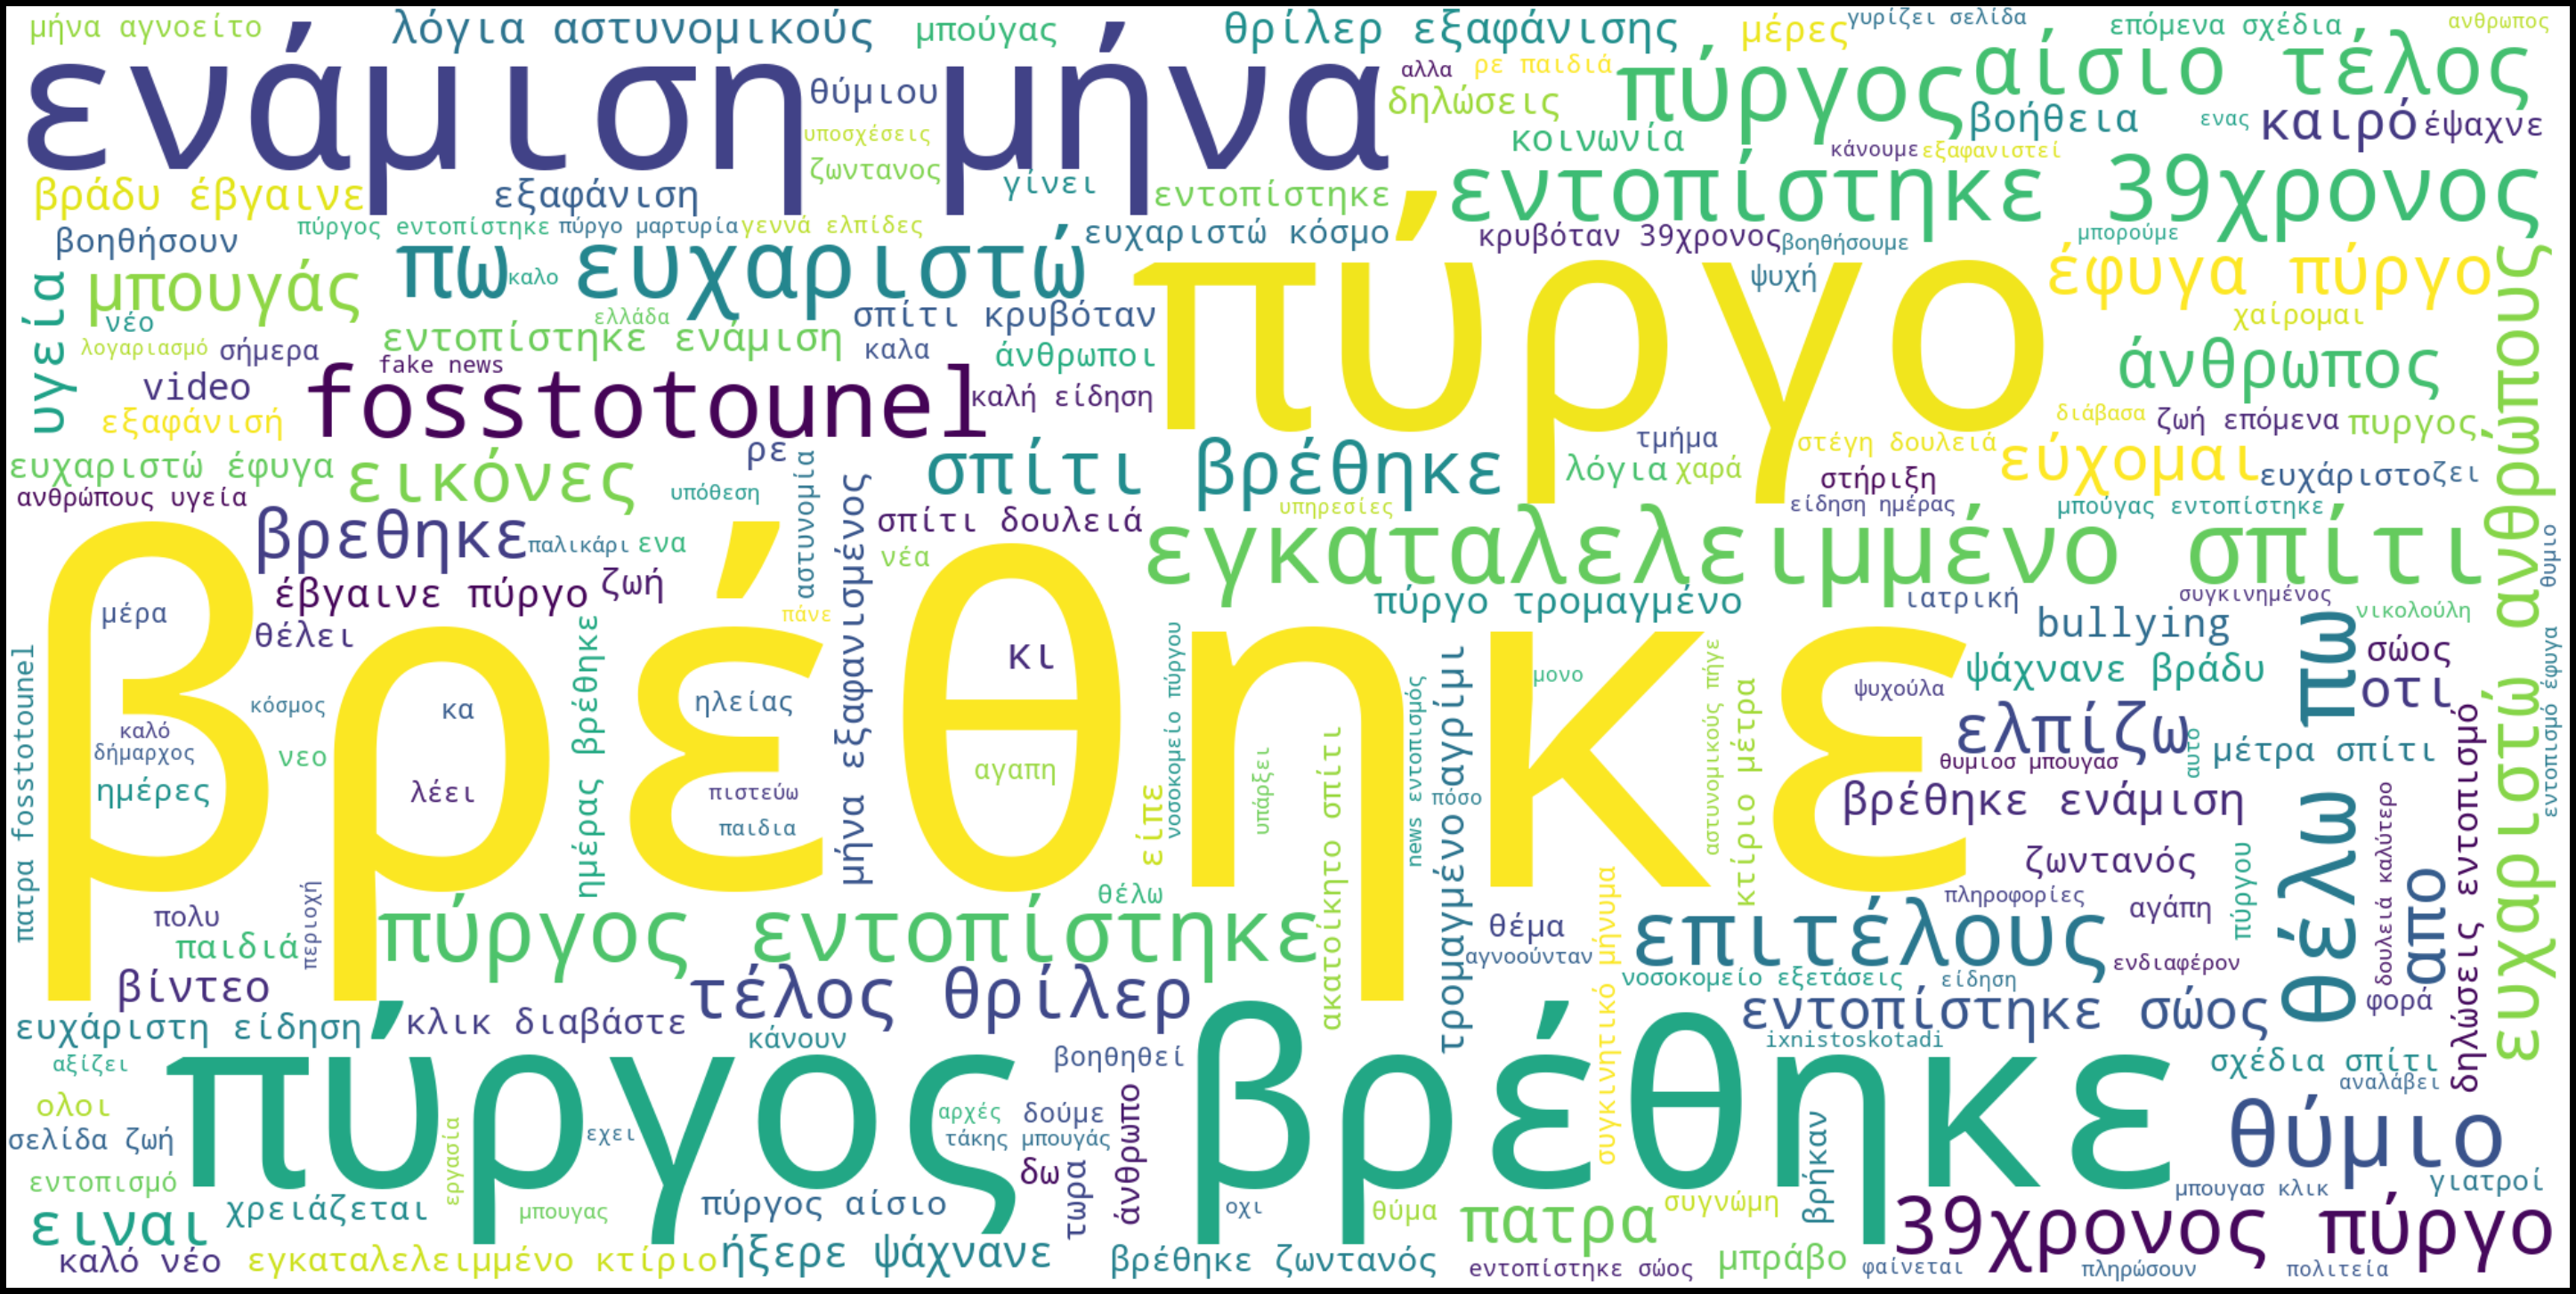

In [33]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Count Vectorizer

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [35]:
count_vector = cv.fit_transform(short_tweets['text'])

In [36]:
# cv.get_feature_names()
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,06,10,108,12,13,16,18,1880,1961,...,όσο,όσοι,όσους,όσων,όταν,ότι,όχι,ύστερα,ώρα,ώστε
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#cv.vocabulary_

In [38]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [39]:
count_vector = cv.fit_transform(short_tweets['text'])

In [40]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,39χρονος,46,amp,bullying,fosstotounel,video,άνθρωπος,έβγαινε,έφυγα,έψαχναν,...,σπίτι,στέγη,στήριξη,σχέδια,σώος,τέλος,τρομαγμένο,υγεία,χρειάζεται,ψάχνανε
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [42]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(short_tweets['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,\n\n,\n,\n,,,,,39χρονος,amp,bullying,...,στέγη,στήριξη,σχέδιο,σώοςς,τέλος,τρομαγμένος,υγεία,υπάρχω,χρειάζομαι,ψάχνανε
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(short_tweets['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,39χρονος,fosstotounel,αίσιο,ανθρώπους,βρέθηκε,εγκαταλελειμμένο,ενάμιση,εντοπίστηκε,επιτέλους,ευχαριστώ,θέλω,θύμιο,μήνα,μπουγάς,πω,πύργο,πύργος,σπίτι,σώος,τέλος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


In [44]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(10)  

βρέθηκε             289
πύργο               142
πύργος              140
εντοπίστηκε         129
σπίτι               118
39χρονος             68
μήνα                 67
ευχαριστώ            64
τέλος                56
εγκαταλελειμμένο     56
dtype: int64

Text(0.5, 1.0, '10 πιο συχνές λέξεις - Tweets #Θυμιος_Μπουγας')

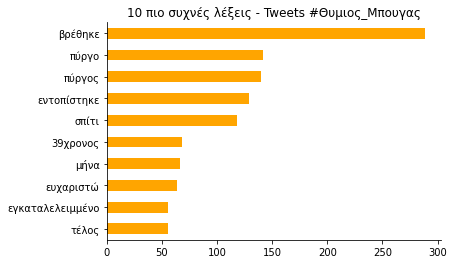

In [47]:
w = sum_words.sort_values(ascending = True).tail(10).plot(kind='barh', color='orange')
w.spines['right'].set_visible(False)
w.spines['top'].set_visible(False)
w.set_title('10 πιο συχνές λέξεις - Tweets #Θυμιος_Μπουγας')

In [45]:
#για δυάδες λέξεων
cv2 = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector2 = cv2.fit_transform(short_tweets['text'])
results2 = pd.DataFrame(count_vector2.toarray(), columns=cv2.get_feature_names()) 
results2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,39χρονος πύργο,έφυγα πύργο,ήξερε ψάχνανε,αίσιο τέλος,βρέθηκε ενάμιση,βρέθηκε πύργο,εγκαταλελειμμένο σπίτι,ενάμιση μήνα,εντοπίστηκε 39χρονος,εντοπίστηκε ενάμιση,εντοπίστηκε σώος,ευχαριστώ ανθρώπους,θέλω πω,θρίλερ εξαφάνισης,λόγια αστυνομικούς,πω ευχαριστώ,πύργος βρέθηκε,πύργος εντοπίστηκε,σπίτι βρέθηκε,τέλος θρίλερ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
#να δουμε τις 10 πιο συχνες δυαδες λεξεων
sum_words2 =  results2.sum(axis =0)
sum_words2.sort_values(ascending = False).head(10) 

πύργος βρέθηκε            47
ενάμιση μήνα              45
εγκαταλελειμμένο σπίτι    43
θέλω πω                   41
πω ευχαριστώ              39
εντοπίστηκε 39χρονος      37
πύργος εντοπίστηκε        34
39χρονος πύργο            31
αίσιο τέλος               31
ευχαριστώ ανθρώπους       27
dtype: int64

Text(0.5, 1.0, '16 πιο συχνές δυάδες λέξεων - Tweets #Θυμιος_Μπουγας')

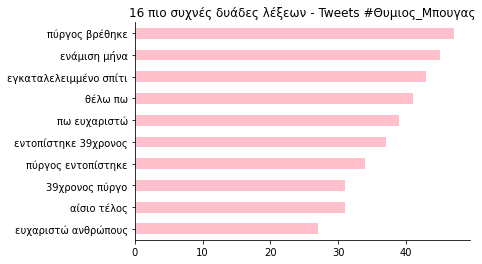

In [48]:
w2 = sum_words2.sort_values(ascending = True).tail(10).plot(kind='barh', color='pink')
w2.spines['right'].set_visible(False)
w2.spines['top'].set_visible(False)
w2.set_title('16 πιο συχνές δυάδες λέξεων - Tweets #Θυμιος_Μπουγας')

## Sentiment Analysis

In [49]:
import glob
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [52]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [53]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Φτιάξε λίστεσ με τα words ανα συναισθημα
angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [55]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)
short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)
short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)
short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)
short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)
short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)
short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)
short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)
short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

In [56]:
short_tweets.head(2)

,date,text,retweet_count,favorite_count,user,id,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2022-06-20 21:49:37,ο μπούγας αυτός ο σπάνιος άνθρωπος δεν ζήτησ...,3,11,James Stewart,1539002556034301952,2022,6,20,0,0,0,0,1,0,0,2,2,2
1,2022-06-20 21:49:04,ο εν τω μεταξυ ουτε που ηξερε οτι τον ψαχνο...,0,0,Μαρια Λιγγου,1539002416368173058,2022,6,20,0,0,0,0,0,0,0,1,1,0


In [57]:
#Ποιος είναι ο βαθμός θετικότητας/positivity/ των tweets
short_tweets['positivity'].sum()

707

In [58]:
short_tweets['negative'].sum()

414

Text(0.8, 0, 'Source: Twitter')

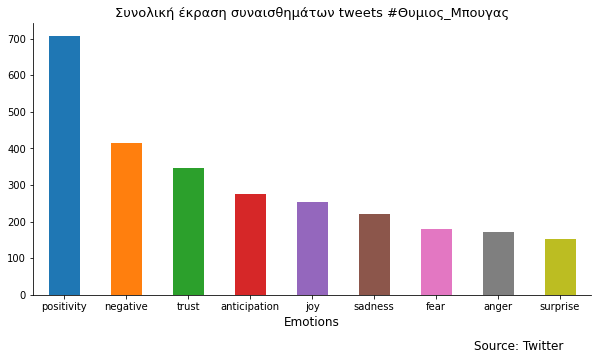

In [113]:
t = short_tweets[['anger','positivity','joy','surprise','trust','anticipation','sadness','negative','fear']].sum().sort_values(ascending= False).plot(kind='bar',color=('C0','C1','C2','C3','C4','C5','C6','C7','C8'), figsize=(10,5))
t.set_title('Συνολική έκραση συναισθημάτων tweets #Θυμιος_Μπουγας', fontsize=13)
t.spines['right'].set_visible(False)
t.spines['top'].set_visible(False)
t.set_xlabel('Emotions', fontsize=12)
#plt.xticks(rotation=45, ha='right') καλύτερο το απο κάτω
t.tick_params(axis='x', labelrotation=0)
plt.suptitle('Source: Twitter',fontsize=12, x=0.8 ,y=0)

Text(0.8, 0, 'Source: Twitter')

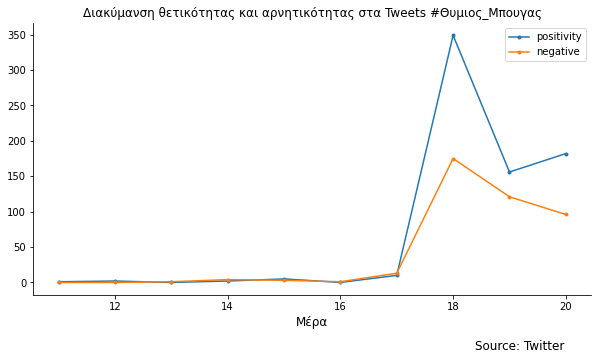

In [117]:
p_n = short_tweets.groupby('day')[['positivity','negative']].sum().plot(figsize=(10,5), marker='.')
p_n.set_title("Διακύμανση θετικότητας και αρνητικότητας στα Tweets #Θυμιος_Μπουγας")
p_n.spines['top'].set_visible(False)
p_n.spines['right'].set_visible(False)
p_n.set_xlabel("Μέρα", fontsize=12)
plt.suptitle('Source: Twitter',fontsize=12, x=0.8 ,y=0)

Text(0.8, 0, 'Source: Twitter')

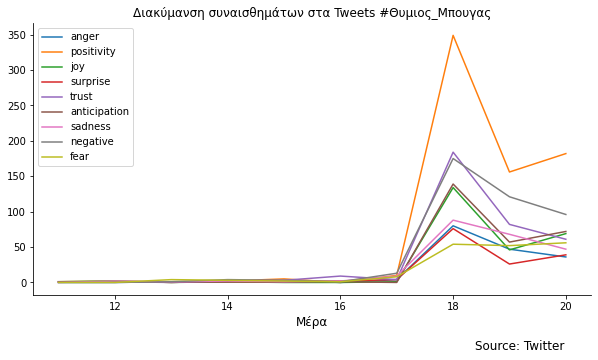

In [120]:
e_m = short_tweets.groupby('day')[['anger','positivity','joy','surprise','trust','anticipation','sadness','negative','fear']].sum().plot(figsize=(10,5))
e_m.set_title("Διακύμανση συναισθημάτων στα Tweets #Θυμιος_Μπουγας")
e_m.spines['top'].set_visible(False)
e_m.spines['right'].set_visible(False)
e_m.set_xlabel("Μέρα", fontsize=12)
plt.suptitle('Source: Twitter',fontsize=12, x=0.8 ,y=0)